Dataset Link: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset/data



In [5]:
!pip install kaggle -q

Importing the Dependencies

In [6]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Data Collection

In [7]:
kaggle_config = json.load(open("/content/kaggle.json"))  # login to kaggle > verify account > profile icon > settings > create new API token


In [8]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [9]:
# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']

In [10]:
# loadig the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
  0% 0.00/20.7M [00:00<?, ?B/s]
100% 20.7M/20.7M [00:00<00:00, 1.20GB/s]


In [11]:
!ls

kaggle.json  sample_data  spotify-million-song-dataset.zip


In [12]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [13]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

Initial Understanding

In [14]:
df.shape

(57650, 4)

In [15]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [17]:
df.isnull().sum()

,0
artist,0
song,0
link,0
text,0


In [18]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [19]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)


In [20]:
df.shape

(10000, 3)

In [21]:
df.head()

,artist,song,text
0,Gary Numan,God Only Knows,I was waiting for something \r\nI was listeni...
1,Coldplay,Songbird,Talking to the songbird yesterday \r\nFlew me...
2,Arlo Guthrie,Moon Song,Words and music by Arlo Guthrie \r\n \r\nBen...
3,Neil Young,I Believe In You,Now that you found yourself losing your mind ...
4,George Harrison,You,"You \r\nGeorge Harrison \r\n \r\n(one, two,..."


In [22]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

WordCloud to visualize the most common words in the lyrics.

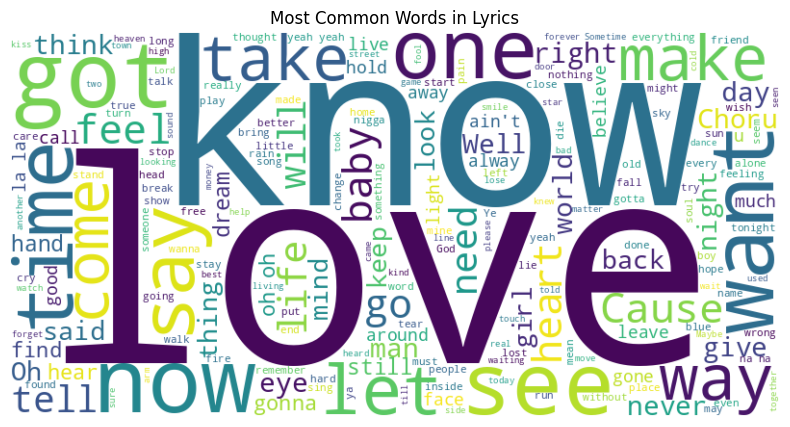

In [23]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing

In [24]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [27]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [28]:
df.head()

,artist,song,text,cleaned_text
0,Gary Numan,God Only Knows,I was waiting for something \r\nI was listeni...,waiting something listening breathing like man...
1,Coldplay,Songbird,Talking to the songbird yesterday \r\nFlew me...,talking songbird yesterday flew place far away...
2,Arlo Guthrie,Moon Song,Words and music by Arlo Guthrie \r\n \r\nBen...,words music arlo guthrie beneath balcony stars...
3,Neil Young,I Believe In You,Now that you found yourself losing your mind ...,found losing mind finding thought real gone ch...
4,George Harrison,You,"You \r\nGeorge Harrison \r\n \r\n(one, two,...",george harrison one two one two three four lov...


In [29]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [30]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [31]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [32]:
df["song"][2]

'Moon Song'

In [33]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
             artist                    song
8669  Kenny Loggins      For The First Time
1216   Human League  Get It Right This Time
8681     Will Smith           It's All Good
2220    Bryan White            Rebecca Lynn
4151      Bob Seger        Real At The Time
